In [2]:
from sklearn.datasets import load_diabetes

In [14]:
data =load_diabetes()

In [15]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [10]:
import pandas as pd

In [16]:
df = pd.DataFrame(data.data, columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [18]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [20]:
X=df

y=data["target"]

In [22]:
X.shape

(442, 10)

In [24]:
y.shape

(442,)

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2,)

In [31]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.153212,0.181349,0.319023,0.236264,0.204736,-0.052931,0.162957,0.234345,0.285154
sex,0.153212,1.000000,0.101559,0.235734,-0.011448,0.115422,-0.384849,0.313360,0.122546,0.200575
bmi,0.181349,0.101559,1.000000,0.430626,0.235662,0.247374,-0.383670,0.416497,0.469039,0.389817
bp,0.319023,0.235734,0.430626,1.000000,0.241248,0.188608,-0.187880,0.261428,0.400931,0.397746
s1,0.236264,-0.011448,0.235662,0.241248,1.000000,0.896056,0.067740,0.522119,0.508975,0.286497
s2,0.204736,0.115422,0.247374,0.188608,0.896056,1.000000,-0.188199,0.647244,0.329498,0.262718
s3,-0.052931,-0.384849,-0.383670,-0.187880,0.067740,-0.188199,1.000000,-0.739497,-0.417871,-0.286334
s4,0.162957,0.313360,0.416497,0.261428,0.522119,0.647244,-0.739497,1.000000,0.632026,0.408692
s5,0.234345,0.122546,0.469039,0.400931,0.508975,0.329498,-0.417871,0.632026,1.000000,0.451572
s6,0.285154,0.200575,0.389817,0.397746,0.286497,0.262718,-0.286334,0.408692,0.451572,1.000000


In [33]:
import seaborn as sns

In [36]:
import matplotlib.pyplot as plt

<Axes: >

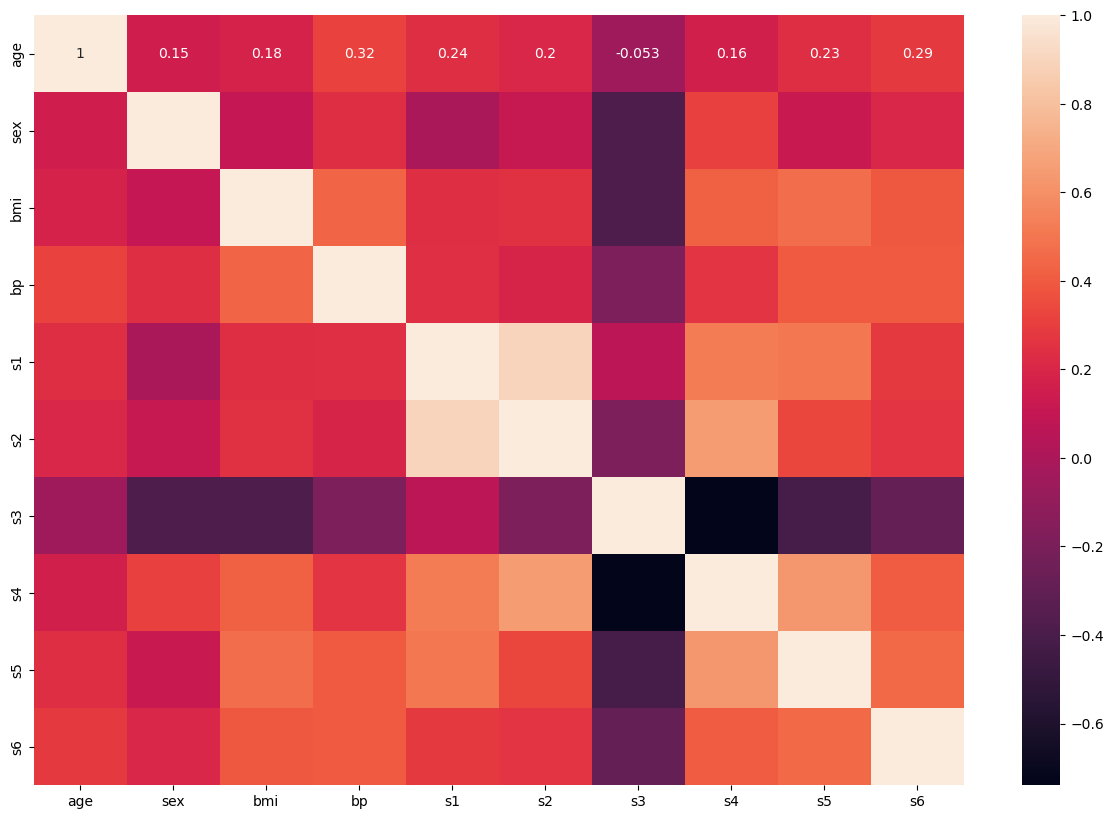

In [41]:
plt.figure(figsize=(15, 10))

sns.heatmap(X_train.corr(), annot=True)

In [48]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

model =DecisionTreeRegressor()

In [49]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [54]:
grid=GridSearchCV(model,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [56]:
grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/site-p

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [58]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [60]:
y_pred=grid.predict(X_test)

In [62]:
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error

In [64]:
rs = r2_score(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [66]:
print(rs, mae, mse)

0.05019616044612696 60.778699994676266 5205.5073217102645


In [68]:
from sklearn import tree

In [71]:
best_fit_model=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [72]:
best_fit_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.5434782608695652, 0.9, 'x[3] <= 0.089\nfriedman_mse = 6042.556\nsamples = 353\nvalue = 152.482'),
 Text(0.2826086956521739, 0.7, 'x[8] <= 0.097\nfriedman_mse = 5823.701\nsamples = 341\nvalue = 149.666'),
 Text(0.4130434782608695, 0.8, 'True  '),
 Text(0.17391304347826086, 0.5, 'x[2] <= 0.054\nfriedman_mse = 5721.189\nsamples = 331\nvalue = 147.556'),
 Text(0.08695652173913043, 0.3, 'x[6] <= -0.014\nfriedman_mse = 4774.163\nsamples = 282\nvalue = 136.543'),
 Text(0.043478260869565216, 0.1, 'friedman_mse = 4692.199\nsamples = 116\nvalue = 164.129'),
 Text(0.13043478260869565, 0.1, 'friedman_mse = 3928.014\nsamples = 166\nvalue = 117.265'),
 Text(0.2608695652173913, 0.3, 'x[9] <= -0.058\nfriedman_mse = 6455.976\nsamples = 49\nvalue = 210.939'),
 Text(0.21739130434782608, 0.1, 'friedman_mse = 480.667\nsamples = 3\nvalue = 126.0'),
 Text(0.30434782608695654, 0.1, 'friedman_mse = 6344.467\nsamples = 46\nvalue = 216.478'),
 Text(0.391304347826087, 0.5, 'x[0] <= -0.042\nfriedman_mse = 

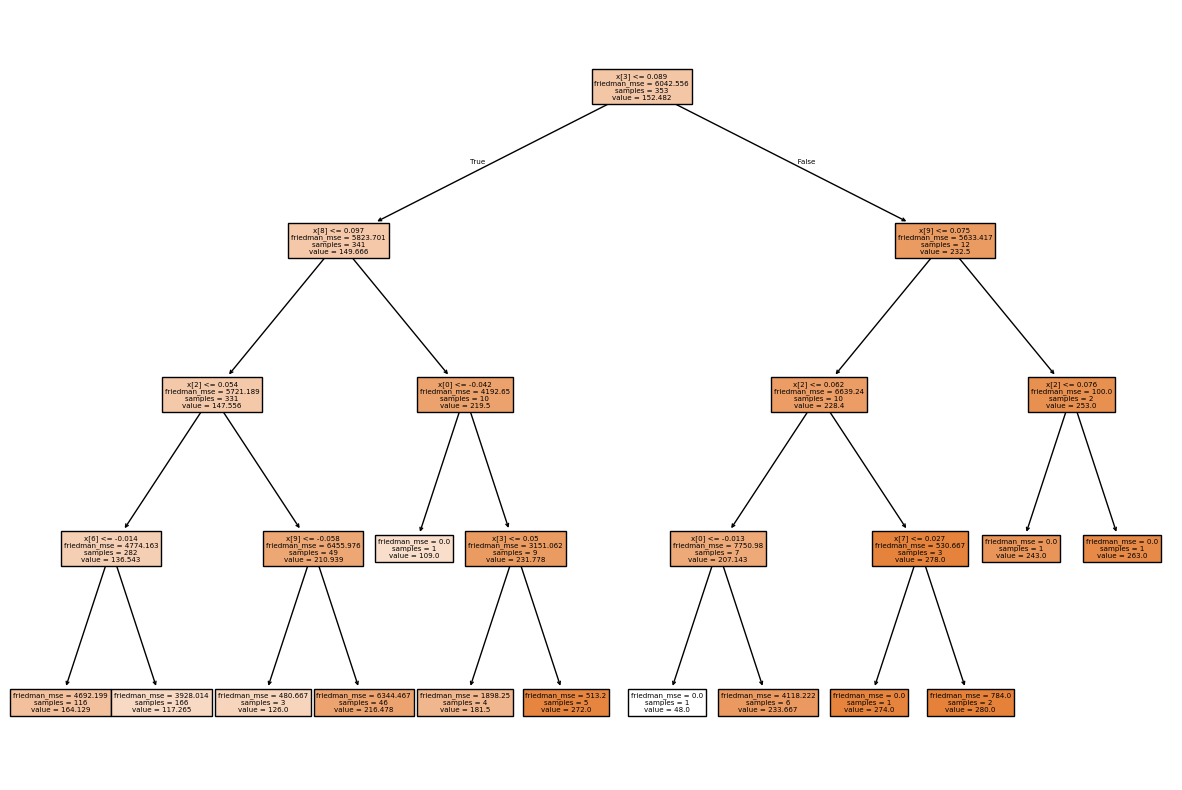

In [73]:
plt.figure(figsize=(15, 10))

tree.plot_tree(best_fit_model, filled=True)